# <center>Laboratorium 10<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, uzupełnić plik main.py, wykonać test na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

***Materiały przygotowujące:***


In [25]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
from numpy.polynomial import polynomial as P

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych lub inaczej mówiąc metodami znajdowania miejsc zerowych funkcji.
W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$, należy wyznaczyć argumenty funkcji $x$, dla których $f(x) = 0$ (funkcja jest równa zero). 

Argumenty $x^*$, dla których $f(x)=0$ nazywamy *pierwiastkami*.

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Dany jest wielomian postaci $W(x)=(x-1)(x-2)\cdot \ldots \cdot (x-20)$.

1. Zdefinuj funkcję *polly_A*, która obliczy współczynniki wielomianu $a_i$ w postaci ogólnej wielomianu $w(x)=a_nx^n+\ldots +a_2x^2+a_1x+1$. Skonstruuj wektor tych współczynników. Użyj funkcji [polyfromroots](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polynomial.polynomial.polyfromroots.html#numpy.polynomial.polynomial.polyfromroots) oraz *linspace*.
2. Zdefinuj funkcję *roots_20*, która w pętli 20 iteracji będzie:  

   i. konstruować wektor współczynników nowego wielomianu w następujący sposób: do każdego wygenerowanego wektora współczynników dodać losową wartość w postaci $(10^{-10})N(0,1)$. Użyj funkcji [random_sample](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).  
  ii. wyliczyać pierwiaski tego wielomianu za pomocą metody [polyroots](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyroots.html#numpy.polynomial.polynomial.polyroots).

3. Narysuj na wykresie te pierwiastki (w każdej iteracji dorysowywać pierwiastki na tym samym rysunku).
4. Określić, który pierwiastek jest najbardziej wrażliwy na zaburzenia.
5. Zaproponować sposób oszacowania uwarunkowania każdego z pierwiastków.

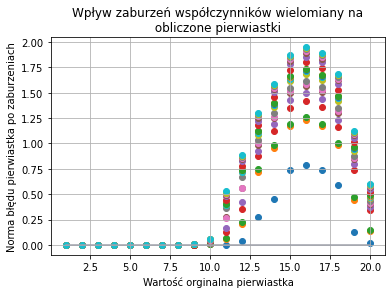

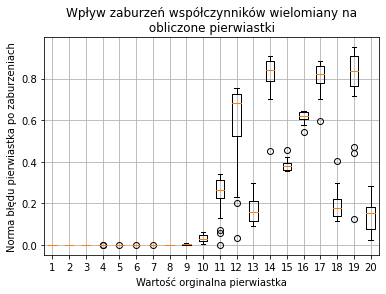

In [26]:
from main import roots_20, polly_A

x = np.arange(1,21)
zero = np.zeros(20)
coef = polly_A(x)
Roots = []

plt.plot(x, zero , color = "#9fa1ab")

for i in range (20):
    coef, roots = roots_20(coef)
    plt.scatter(x, abs(x - np.sort(roots)))
    Roots.append(roots)

plt.grid()
plt.title("Wpływ zaburzeń współczynników wielomiany na\n obliczone pierwiastki ")
plt.ylabel("Norma błędu pierwiastka po zaburzeniach")
plt.xlabel("Wartość orginalna pierwiastka")
plt.show()

plt.boxplot(np.abs(x - np.real(Roots)))
plt.grid()
plt.title("Wpływ zaburzeń współczynników wielomiany na\n obliczone pierwiastki ")
plt.ylabel("Norma błędu pierwiastka po zaburzeniach")
plt.xlabel("Wartość orginalna pierwiastka")
plt.show()


c:\users\agata\appdata\local\programs\python\python38\lib\site-packages\matplotlib\collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


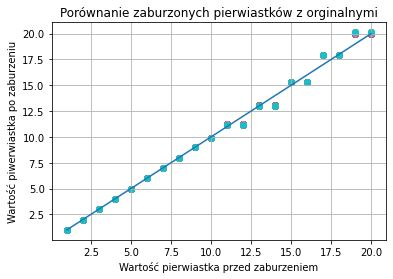

In [27]:
for i in range (20):
    coef, roots = roots_20(coef)
    plt.scatter(x, roots)

plt.plot(x,x)
plt.grid()
plt.title("Porównanie zaburzonych pierwiastków z orginalnymi")
plt.ylabel("Wartość piwerwiastka po zaburzeniu")
plt.xlabel("Wartość pierwiastka przed zaburzeniem")
plt.show()

Uwarunkowanie określa jak błąd danych wejściowych wpływa na zmianę danych wyjściowych. Przy każdej
iteracji błąd wejściowy się nam zwiększa, więc aby zobaczyć jedynie zmiany powodowane zwrostem błędu na wejściu
można na przykład zbadać zachowanie błędu dla poszczególnyh iteracji (co zrobiliśmy wcześniej)
i aby wizualizacja była bardziej przejżysta, "przyciągnąć" normy do osi x. Pozwoli nam to łatwo
porównać, jak bardzo błąd wyniku rośnie między kolejnymi iteracjami, dla różnych pierwiastków

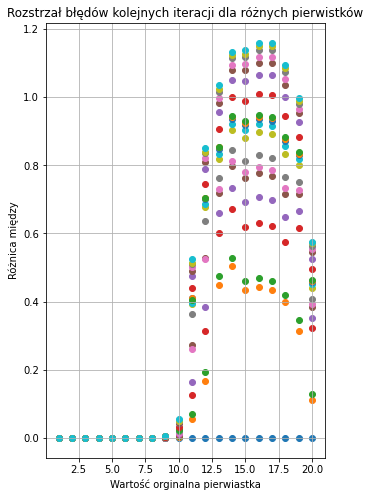

In [28]:
mins = []
plt.figure(figsize=(5,8))

for i in range (20):
    min1 = np.abs(x[i] - Roots[0][i])
    for j in range (20):
        min2 = np.abs(x[i] - Roots[j][i])
        if min2 < min1:
            min1 = min2

    mins.append(min1)



for i in range(20):
    plt.scatter(x, np.abs(x - Roots[i]) - mins)

plt.grid()
plt.title("Rozstrzał błędów kolejnych iteracji dla różnych pierwistków")
plt.ylabel("Różnica między")
plt.xlabel("Wartość orginalna pierwiastka")
plt.show()

***Podsumowanie zad 1***

- (Odpowiedź na pyt 4) Najbardziej wrażliwe na zaburzenia okazały sie pierwiastki od 15 do 19, jako że drobna zmiana
danych wejściowych powodowała największy roztrzał błędu.

- Boxplot okazał się mało czytelny ze względu na dużą ilość próbek, uznanych za elementy "odstające",
które nie zostały liczone w minimach i maximach

- Pierwiaski od 1 do 9 wydają się być praktycznie odporne na zaburzenia - roztrzał zaczyna się pojawiać dopiero dla 10

- Ciekawym jest fakt, że od pierwiastka 11, część rzeczywista miesc zerowych jest
parami taka sama. Możliwe, że rozwiązania po prostu zamiast być czysto rzeczywiste po zaburzeniach
stały się zespolone, a jak wiadomo, gdy liczba zespolona jest pierwiastkiem wielomianu, to jest nim także jej sprzężenie

- Pierwsze zaburzenia powodują największy błąd, następne błędy znajdują się już "bliżej siebie"

- Mały błąd danych wejścia (rzędu -10) na współczynnikach, powoduje relatywnie duże błędy w wyznaczeniu pierwiastków

***Zadanie 2.***  
Dany jest wielomian $w_1(x)=(x-1)^8$. Wyznacz numerycznie miejsca zerowego tego wielomianu poprzez wyznaczenie wartości własnych macierzy Frobeniusa. W związku z tym wykonaj następujące czynności:  

1. Zaiplementuj funkcję tworzącą [macierz Frobenusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf) *frob_a*, dla zadanego wektora współczynników wielomianu $w(x)$.  
2. Wyznacz wartości własne przekształconej macierzy za pomocą funkcji [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals).  
3. Dokonaj rozkładu Schura macierzy zdefiniowanej w punkcie 1. użyj funkcji [schure](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur).  
4. Porównaj wyniki z funkcją polyroots.

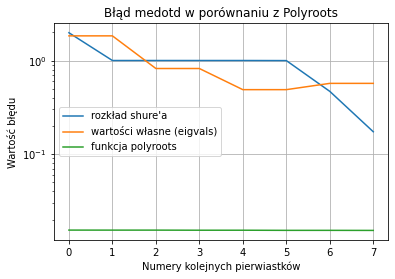

In [29]:
from main import frob_a

root1 = np.ones(8)
coef = polly_A(root1)

frob, eigval, shure, roots_poly = frob_a(coef)

err_poly = np.abs(root1 - roots_poly)
err_eig = np.abs(root1 - np.sort(eigval)[1:])
err_shure = np.abs(root1 - np.sort(np.diag(shure[0][1:])))


plt.plot(err_shure, label = "rozkład shure'a")
plt.plot(err_eig, label = "wartości własne (eigvals)")
plt.plot(err_poly, label = "funkcja polyroots")

plt.legend()
plt.grid()
plt.yscale('log')
plt.title("Błąd medotd w porównaniu z Polyroots")
plt.xlabel("Numery kolejnych pierwiastków")
plt.ylabel("Wartość błędu")
plt.show()

c:\users\agata\appdata\local\programs\python\python38\lib\site-packages\matplotlib\collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


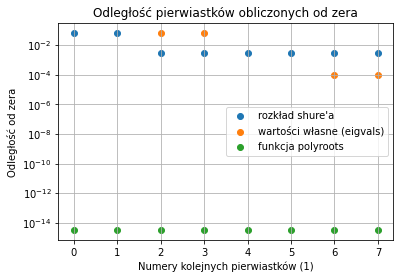

In [30]:
def w1(x):
    return (x-1)**8

#nie wiem czemu, ale wywołanie funkcji dla wektora nie
#działało i musiałam użyć pętli iteracyjnych

si = np.arange(np.size(roots_poly))
w21 = []
w22 = []
w23 = []

for i in si:
    w21.append(w1(np.diag(shure[0])[i+1]))
    w22.append(w1(eigval[i+1]))
    w23.append(w1(roots_poly[i]))

plt.scatter(si,w21, label = "rozkład shure'a")
plt.scatter(si,w22, label = "wartości własne (eigvals)")
plt.scatter(si,w23, label = "funkcja polyroots")
plt.legend()
plt.grid()
plt.yscale('log')
plt.title("Odległość pierwiastków obliczonych od zera")
plt.ylabel("Odległość od zera")
plt.xlabel("Numery kolejnych pierwiastków (1)")
plt.show()

In [31]:
def shure_with_frob(wsp):
    left = np.zeros((wsp.size - 1, 1))
    frob_m = np.eye(wsp.size - 1)

    frob_m = np.c_[left, frob_m]

    frob_m = np.concatenate((frob_m, np.reshape(-wsp, (1, wsp.shape[0]))), axis=0)

    return scipy.linalg.schur(frob_m)

def eigval_with_frob(wsp):
    left = np.zeros((wsp.size - 1, 1))
    frob_m = np.eye(wsp.size - 1)

    frob_m = np.c_[left, frob_m]

    frob_m = np.concatenate((frob_m, np.reshape(-wsp, (1, wsp.shape[0]))), axis=0)

    return np.linalg.eigvals(frob_m)


print("\nczas wyznaczenia wartości własnych, gdy ma się już macierz Frobenusa:")
time_just_eigvals = %timeit -r 50 -n 20 -o np.linalg.eigvals(frob)
print("\nczas rozkładu Shure'a, gdy ma się już macierz Frobenusa:")
time_just_shure = %timeit -r 50 -n 20 -o scipy.linalg.schur(frob)
print("\nczas wyznaczenia wartości własnych wraz ze stworzeniem macierzy Frobenusa:")
time_eigval_with_frob = %timeit -r 50 -n 20 -o eigval_with_frob(coef)
print("\nczas rozkładu Shure'a wraz ze stworzeniem macierzy Frobenusa:")
time_shure_with_frob = %timeit -r 50 -n 20 -o shure_with_frob(coef)
print("\nczas obliczenia pierwiastków analitycznie za pomocą funkcji polyroots:")
time_poly = %timeit -r 50 -n 20 -o P.polyroots(coef)



czas wyznaczenia wartości własnych, gdy ma się już macierz Frobenusa:
27.1 µs ± 1.85 µs per loop (mean ± std. dev. of 50 runs, 20 loops each)

czas rozkładu Shure'a, gdy ma się już macierz Frobenusa:
45.7 µs ± 9.25 µs per loop (mean ± std. dev. of 50 runs, 20 loops each)

czas wyznaczenia wartości własnych wraz ze stworzeniem macierzy Frobenusa:
70.2 µs ± 25.6 µs per loop (mean ± std. dev. of 50 runs, 20 loops each)

czas rozkładu Shure'a wraz ze stworzeniem macierzy Frobenusa:
The slowest run took 9.61 times longer than the fastest. This could mean that an intermediate result is being cached.
90.4 µs ± 66.4 µs per loop (mean ± std. dev. of 50 runs, 20 loops each)

czas obliczenia pierwiastków analitycznie za pomocą funkcji polyroots:
The slowest run took 5.05 times longer than the fastest. This could mean that an intermediate result is being cached.
87.3 µs ± 47.5 µs per loop (mean ± std. dev. of 50 runs, 20 loops each)


***Podsumowanie zad 2***

Dla powyższego przykładu zdecydowanie najlepiej spisała się funkcja polyroots. Jest ona tylko odrobinę
wolniejsza niż pozostałe funkcje w przypadku, gdy nie mamy macierzy Frobenusa, a zwraca ona wartośći dużo
bliższe wartością prawdziwym.

Rozkład Shure'a i wartości własne zachowują się podobnie - rozkład Shure'a jest odrobinę dokładniejszy,
na pewnym przedziale, gdy rozkład na wartości własne na innym. Ich złożoności obliczeniowe są bardzo podobne.

Jeśli z jakiegoś powodu mamy już wcześniej wyznaczoną macierz Frobenusa to czas obliczeń dla wartości własnych oraz
rozkładu Shure'a jest ponad dwa razy mniejszy od czasu potrzebnego do zastosowania polyroots.

***Zadanie 3.***
Dla danego wielomianu $w_2(x) = 243x^7-486x^6+783x^5-990x^4+558x^3-28x^2-72x+16$ wyznacz miejsca zerowe numerycznie, w taki sam sposób jak w zadaniu 2.

W tym zadaniu błędy były obliczane względem pierwiasktów wyznaczonych przez funkcję polyroots, jako że
nie znamy dokładnych ich wartości, a funkcja polyroots w poprzednim zadaniu okazała się najbardziej skuteczna

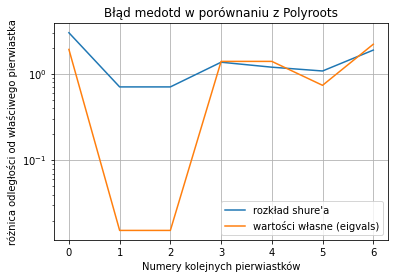

In [32]:
from main import frob_a

coef = np.array([243, -486, 783, -990, 558,-28,-72,16])

if coef[0] != 1:
    coef = coef/coef[0]

def w2(x):
    return coef[0] * x**7 + coef[1] * x**6 + coef[2] * x**5 + coef[3] * x**4 + coef[4] * x**3 + coef[5] * x**2+ coef[6] * x + coef[7]

frob, eigval, shure, roots_poly = frob_a(coef)

err_eig = np.abs(roots_poly - np.sort(eigval)[1:])
err_shure = np.abs(roots_poly - np.sort(np.diag(shure[0][1:])))


plt.plot(err_shure, label = "rozkład shure'a")
plt.plot(err_eig, label = "wartości własne (eigvals)")

plt.legend()
plt.grid()
plt.yscale('log')
plt.title("Błąd medotd w porównaniu z Polyroots")
plt.xlabel("Numery kolejnych pierwiastków")
plt.ylabel("różnica odległości od właściwego pierwiastka")
plt.show()

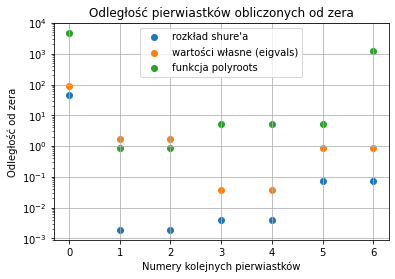

In [33]:
si = np.arange(np.size(roots_poly))
w21 = []
w22 = []
w23 = []

for i in si:
    w21.append(abs(w2(np.diag(shure[0])[i+1])))
    w22.append(abs(w2(eigval[i+1])))
    w23.append(abs(w2(roots_poly[i])))



plt.scatter(si,w21, label = "rozkład shure'a")
plt.scatter(si,w22, label = "wartości własne (eigvals)")
plt.scatter(si,w23, label = "funkcja polyroots")
plt.legend()
plt.grid()
plt.yscale('log')
plt.title("Odległość pierwiastków obliczonych od zera")
plt.ylabel("Odległość od zera")
plt.xlabel("Numery kolejnych pierwiastków")
plt.show()

In [34]:
print("\nczas wyznaczenia wartości własnych, gdy ma się już macierz Frobenusa:")
time_just_eigvals = %timeit -r 50 -n 20 -o np.linalg.eigvals(frob)
print("\nczas rozkładu Shure'a, gdy ma się już macierz Frobenusa:")
time_just_shure = %timeit -r 50 -n 20 -o scipy.linalg.schur(frob)
print("\nczas wyznaczenia wartości własnych wraz ze stworzeniem macierzy Frobenusa:")
time_eigval_with_frob = %timeit -r 50 -n 20 -o eigval_with_frob(coef)
print("\nczas rozkładu Shure'a wraz ze stworzeniem macierzy Frobenusa")
time_shure_with_frob = %timeit -r 50 -n 20 -o shure_with_frob(coef)
print("\nczas obliczenia pierwiastków analitycznie za pomocą funkcji polyroots:")
time_poly = %timeit -r 50 -n 20 -o P.polyroots(coef)


czas wyznaczenia wartości własnych, gdy ma się już macierz Frobenusa:
47.2 µs ± 19.2 µs per loop (mean ± std. dev. of 50 runs, 20 loops each)

czas rozkładu Shure'a, gdy ma się już macierz Frobenusa:
40.7 µs ± 19.5 µs per loop (mean ± std. dev. of 50 runs, 20 loops each)

czas wyznaczenia wartości własnych wraz ze stworzeniem macierzy Frobenusa:
51.6 µs ± 7.97 µs per loop (mean ± std. dev. of 50 runs, 20 loops each)

czas rozkładu Shure'a wraz ze stworzeniem macierzy Frobenusa
52.1 µs ± 930 ns per loop (mean ± std. dev. of 50 runs, 20 loops each)

czas obliczenia pierwiastków analitycznie za pomocą funkcji polyroots:
61.1 µs ± 20.3 µs per loop (mean ± std. dev. of 50 runs, 20 loops each)


***Podsumowanie zad 3:***

Okazuje się, że tym razem to rozkład Shure'a jest najlepszy, a funkcja polyroots zwraca nam pierwiastki,
dla których błąd odległości od zera (które powinno być zerem) jest nawet trzeciego rzędu!
Gdy na pierwszym wykresie odległość miejsc zerowych obliczonych przez shur oraz eigvals od tych obliczonych
przez polyroots jest duża , nie dlatego, że są one mniej dokładne od polyroots, tylko wręcz przeciwnie!
To polyroots jest mniej dokładne od pozostałych metod.

Złożoności czasowe zachowują się bardzo podobnie, co w poprzednim ćwiczeniu - jeśli nie musimy wyliczać
macierzy Frobenusa polyroots jest około dwa razy wolniejszy. Jeśli musimy, to wszystkie metody potrzebują
mniej więcej tyle samo czasu.

***Zadanie 4.***

Dany jest wielomian: 
$$
w_3(x)= x^5 - 156x^4 - 5x^3 + 780x^2 + 4x - 624
$$.
 Wiedząc, że wielomian ten w postaci szeregu Czebyszewa jest następujący 
 $$w_3(x)= (a_0+\frac{a_2}{2}+ \frac{3a_4}{4})T_0(x)+(a_1+\frac{3a_3}{4}+ \frac{5a_5}{8})T_1(x)+(\frac{a_2}{2}+ \frac{a_4}{4})T_2(x)+(\frac{a_3}{4}+ \frac{5a_5}{16})T_3(x)+ (\frac{a_4}{8})T_4 + (\frac{a_5}{16})T_5(x)$$ 
 znajdź pierwiastki wykorzystując funkcję [chebroots](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebroots.html).

[-0.99946576 -0.50825851  0.02246995  0.49113043  1.00053414]


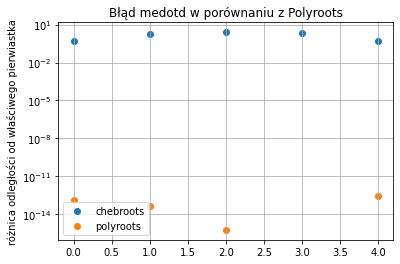

In [35]:
a = np.array([1,-156,-5, 780,4,-624])

def w3(x):
    return a[5] * x**5 + a[4] * x**4 + a[3] * x**3 + a[2] * x**2 + a[1] * x + a[0]


coef1 = a[0] + a[2] / 2 + 3 * a[4] / 4
coef2 = a[1] + 3 * a[3] /4 + 5 * a[5] / 8
coef3 = a[2]/2 + a[4]/4
coef4 = a[3]/4 + 5*a[5]/16
coef5 = a[4]/8
coef6 = a[5]/16

coef = np.array([coef1, coef2, coef3, coef4, coef5, coef6])
cheb_roots = np.sort(np.polynomial.chebyshev.chebroots(coef))
roots_poly =np.sort(P.polyroots(a))

print(cheb_roots)


si = np.arange(np.size(cheb_roots))


w21 = abs(w3(cheb_roots))
w22 = abs(w3(roots_poly))

plt.scatter(si,w21, label = "chebroots")
plt.scatter(si,w22, label = "polyroots")
plt.legend()
plt.yscale('log')
plt.grid()

plt.title("Błąd medotd w porównaniu z Polyroots")
plt.ylabel("różnica odległości od właściwego pierwiastka")
plt.show()

In [36]:
print("\nczas wyznaczenia miesc zerowych z wielomianu Czebyszewa")
time_cheb = %timeit -r 50 -n 20 -o np.sort(np.polynomial.chebyshev.chebroots(coef))
print("\nczas obliczenia pierwiastków analitycznie za pomocą funkcji polyroots:")
time_poly = %timeit -r 50 -n 20 -o np.sort(P.polyroots(coef))


czas wyznaczenia miesc zerowych z wielomianu Czebyszewa
66 µs ± 22.7 µs per loop (mean ± std. dev. of 50 runs, 20 loops each)

czas obliczenia pierwiastków analitycznie za pomocą funkcji polyroots:
46.8 µs ± 9.56 µs per loop (mean ± std. dev. of 50 runs, 20 loops each)


***Podsumowanie zad 4***

Miesca zerowe dla przybliżenia wielomianu wielomianem czebyszewa z sześcioma współczynnikami
zwraca nam wyniki dużo bardziej odległe od zera niż funkcja polyroots. Dokładniej mówiąc aż o około 14 rzędów
wielkości bardziej odległe.
Wielomiany Czebyszewa są też wolniejsze, może nie o jakieś przerażające wielkości, ale tak ok 0.2 razy wolniejsze od
obliczeń analitycznych.